In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# if torch is not installed:
# !pip install torch

In [3]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [4]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)


# 1D helix functions with 4 different parameters
x = r cos(t)

In [5]:
import pandas as pd
import torch
import random

# x = r cos(t)
# 1024 data points, 256 from each helix of a specific r
# each data point contains a x value and a class number idenfiying
#    the helix of a specific r
training_data = torch.zeros(1024,2).numpy()
test_data = torch.zeros(128,2).numpy()
training_labels = torch.zeros(1024).numpy()
test_labels = torch.zeros(128).numpy()
training_data.shape

(1024, 2)

In [6]:
# 4 random r values
rand_r = np.random.rand(4)
rand_r

array([0.02728135, 0.27489935, 0.44716064, 0.35064982])

In [7]:
class_id = 0
for r in rand_r:
    # generate training data
    t = np.random.rand(256)
    x = r * np.sin(t * np.pi)
    training_labels[class_id*256:(class_id+1)*256] = class_id
    training_data[class_id*256:(class_id+1)*256,0] = t
    training_data[class_id*256:(class_id+1)*256,1] = x

    # generate test data
    t = np.random.rand(32)
    x = r * np.sin(t * np.pi)
    test_labels[class_id*32:(class_id+1)*32] = class_id
    test_data[class_id*32:(class_id+1)*32,0] = t
    test_data[class_id*32:(class_id+1)*32,1] = x
    class_id += 1
training_data

array([[0.03268984, 0.00279682],
       [0.45625487, 0.02702413],
       [0.6324506 , 0.02495343],
       ...,
       [0.42099077, 0.3399033 ],
       [0.6849571 , 0.29310164],
       [0.35424924, 0.3145285 ]], dtype=float32)

import matplotlib.pyplot as plt
from cycler import cycler

my_colours = ['steelblue', 'seagreen', 'firebrick']
custom_cycler = cycler(color=my_colours)

fig, ax = plt.subplots()
ax.set_prop_cycle(custom_cycler)
ax.plot()
plt.show()

In [8]:
test_data

array([[4.53093424e-02, 3.87022295e-03],
       [8.66515696e-01, 1.11081470e-02],
       [4.91478473e-01, 2.72715800e-02],
       [1.46471560e-01, 1.21152699e-02],
       [2.43257388e-01, 1.88779049e-02],
       [5.56323528e-01, 2.68553812e-02],
       [9.41311479e-01, 5.00156078e-03],
       [6.19049132e-01, 2.53954493e-02],
       [1.17818512e-01, 9.86886304e-03],
       [3.97082299e-01, 2.58677453e-02],
       [6.04585826e-01, 2.58219671e-02],
       [4.26519841e-01, 2.65576746e-02],
       [8.06347668e-01, 1.55922836e-02],
       [9.52330679e-02, 8.04090872e-03],
       [7.83136308e-01, 1.71818342e-02],
       [3.85371208e-01, 2.55314093e-02],
       [4.26760912e-01, 2.65623946e-02],
       [7.69554257e-01, 1.80701222e-02],
       [5.99728584e-01, 2.59532891e-02],
       [8.16594720e-01, 1.48636624e-02],
       [6.87676907e-01, 2.26751901e-02],
       [8.35791171e-01, 1.34578412e-02],
       [2.39764214e-01, 1.86606366e-02],
       [7.74245501e-01, 1.77669469e-02],
       [7.700272

In [9]:
training_data = training_data.reshape((training_data.shape[0], training_data.shape[1], 1))
training_data

array([[[0.03268984],
        [0.00279682]],

       [[0.45625487],
        [0.02702413]],

       [[0.6324506 ],
        [0.02495343]],

       ...,

       [[0.42099077],
        [0.3399033 ]],

       [[0.6849571 ],
        [0.29310164]],

       [[0.35424924],
        [0.3145285 ]]], dtype=float32)

In [10]:
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], 1))
test_data

array([[[4.53093424e-02],
        [3.87022295e-03]],

       [[8.66515696e-01],
        [1.11081470e-02]],

       [[4.91478473e-01],
        [2.72715800e-02]],

       [[1.46471560e-01],
        [1.21152699e-02]],

       [[2.43257388e-01],
        [1.88779049e-02]],

       [[5.56323528e-01],
        [2.68553812e-02]],

       [[9.41311479e-01],
        [5.00156078e-03]],

       [[6.19049132e-01],
        [2.53954493e-02]],

       [[1.17818512e-01],
        [9.86886304e-03]],

       [[3.97082299e-01],
        [2.58677453e-02]],

       [[6.04585826e-01],
        [2.58219671e-02]],

       [[4.26519841e-01],
        [2.65576746e-02]],

       [[8.06347668e-01],
        [1.55922836e-02]],

       [[9.52330679e-02],
        [8.04090872e-03]],

       [[7.83136308e-01],
        [1.71818342e-02]],

       [[3.85371208e-01],
        [2.55314093e-02]],

       [[4.26760912e-01],
        [2.65623946e-02]],

       [[7.69554257e-01],
        [1.80701222e-02]],

       [[5.99728584e-01],
  

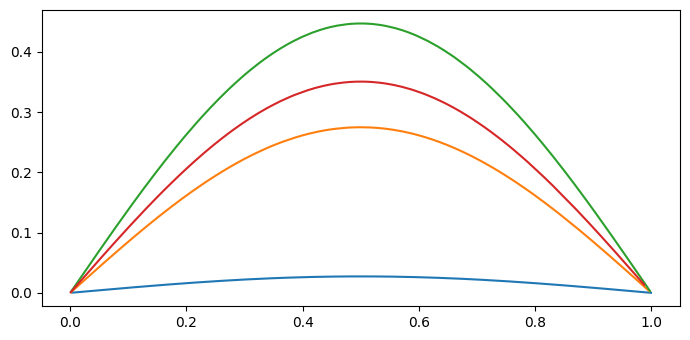

In [11]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

class1 = (training_data[training_labels == 0, :][:,:,0])
class2 = (training_data[training_labels == 1, :][:,:,0])
class3 = (training_data[training_labels == 2, :][:,:,0])
class4 = (training_data[training_labels == 3, :][:,:,0])

# order x and y values so the series can be plotted
class1 = class1[class1[:,0].argsort()]
class2 = class2[class2[:,0].argsort()]
class3 = class3[class3[:,0].argsort()]
class4 = class4[class4[:,0].argsort()]

x1, y1 = class1.T
x2, y2 = class2.T
x3, y3 = class3.T
x4, y4 = class4.T

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)

plt.show()

In [12]:
# shuffle rows in training data and training labels
idx = np.random.permutation(len(training_data))
training_data = training_data[idx]
training_labels = training_labels[idx].astype(int)

In [13]:
# shuffle rows in test data and test labels
idx = np.random.permutation(len(test_data))
test_data = test_data[idx]
test_labels = test_labels[idx].astype(int)

In [14]:
class NBatchProgBarLogger(keras.callbacks.Callback):
    """
    A Logger that log average performance per `display` steps.
    """
    def __init__(self, display):
        self.counter = 0
        self.display = display
        self.epoch = 0
        
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch = epoch

    def on_epoch_end(self, batch, logs=None):
        if self.counter == self.display or self.epoch == 1:
            print('Epoch: ' + str(self.epoch) + ', training loss: ' + str(logs['loss'])
             + ', training accr: ' + str(logs['sparse_categorical_accuracy'])
             + ', val loss: ' + str(logs['val_loss'])
             + ', val accr: ' + str(logs['val_sparse_categorical_accuracy']))
            if self.epoch > 1:
                self.counter = 0
        self.counter += 1

In [15]:
input_shape = training_data.shape[1:]
n_classes = len(np.unique(training_labels))
display_interval = 50

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.2,
    dropout=0.1,
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["sparse_categorical_accuracy"],
)

model.summary()

# callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True), NBatchProgBarLogger(display_interval)]


history = model.fit(
    training_data,
    training_labels,
    validation_split=0.25,
    epochs=500,
    batch_size=64,
    callbacks=callbacks,
    # verbose=1 if epoch%display_interval==0 else 0
    # set verbose = 1 to see a progress bar for every epoch
    verbose = 0
)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 1)]       0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 2, 1)        2           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 2, 1)        7169        ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

 mbda)                                                            'tf.__operators__.add_5[0][0]'] 
                                                                                                  
 layer_normalization_7 (LayerNo  (None, 2, 1)        2           ['tf.__operators__.add_6[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv1d_6 (Conv1D)              (None, 2, 4)         8           ['layer_normalization_7[0][0]']  
                                                                                                  
 dropout_7 (Dropout)            (None, 2, 4)         0           ['conv1d_6[0][0]']               
                                                                                                  
 conv1d_7 (Conv1D)              (None, 2, 1)         5           ['dropout_7[0][0]']              
          

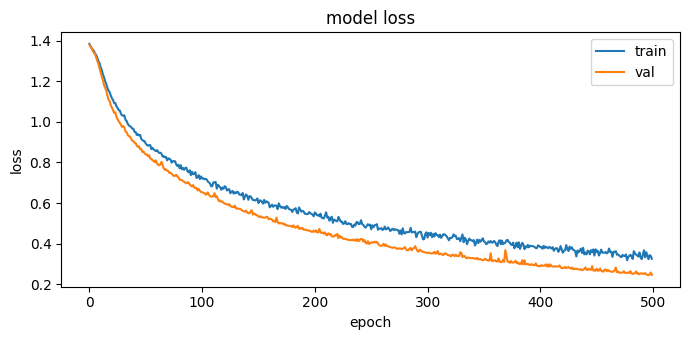

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

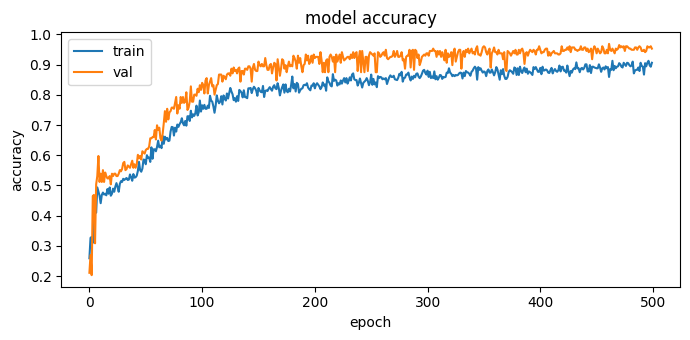

In [17]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [18]:
# Evaluate the model on the test set
results = model.evaluate(test_data, test_labels, verbose=0)
print("Test loss, test acc:", results)

Test loss, test acc: [0.31187450885772705, 0.8984375]
